# Marvel's Shang-Chi and the Lengend of The Ten Rings

Disney and Marvel movies releasing movies strategy has changed with COVID-19. After
the world got back to normal and movie theaters opened its doors to people, Disney and Marvel
started releasing new movies simultaneously in theaters and on its own streaming platform. Which
affects the box office revenues. Shang-chi movie revenue might change this strategy if it achieved
a high enough gross. So, advertisement is necessary to make this movie one of the highest in
profit. Advertising the new movie in crowded places, using all different sizes and formats of ads
ranging from fixed posters to illuminated urban advertising and moving images in crowded places.
In addition to using social media on location advertising features. And the best place to test the
marketing theory is on a crowded subway in a big city like New York. For this project, taking
advantage of free, accessible data about the patterns of transit traffic in New York City which is
MTA turnstile data is the best thing to do. I will utilize some tools to help me find the wanted
result from the dataset like SQLAlchemy for querying the data, Numpy and Pandas for data
manipulation, Matplotlib and Seaborn for plotting. When needed, additional tools and libraries
will be used to explore the dataset. The MVP goal of this project is to choose the best place for
advertisements to increase film revenues. By exploring the MTA dataset to have an insight in
where to advertise and what are the best suitable times.

Using Marvel: [Marvel Cinematic Universe movies Dataset](https://www.kaggle.com/prashantk93/marvel-cinematic-universe-movies-dataset/version/5)
we can predict the box office values from previous movies values. especally the movie Black Widow since it's the only movie that was released after COVID-19

Marvel database is located on a postgresql server, but in the mean time we will discover the values directly from CSV fiel until the database is configured correctly.

In [1]:
import pandas as pd
import numpy as np

In [2]:
marvel_df = pd.read_csv('MCU_movies_Dataset.csv', encoding= 'unicode_escape')
marvel_df

,Id,Title,Phase,Genres,Release Date,Director,ScreenWriter,Producer,Cast,Plot,Language,Filming Locations,Status,Movie Rating,Review Rating,Movie Run Time,Budget,Box office
0,1,Iron Man,Phase One,"Action, Adventure, Sci-Fi",2/5/2008,Jon Favreau,Mark Fergus & Hawk Ostby and Art Marcum & Matt...,Avi Arad and Kevin Feige,"Robert Downey Jr., Gwyneth Paltrow, Terrence H...","After being held captive in an Afghan cave, bi...","English, Persian, Urdu, Arabic, Hungarian","Palmdale Regional Airport, Palmdale, Californi...",Released,PG-13,7.9,126 min,140000000.0,5.851742e+08
1,2,The Incredible Hulk,Phase One,"Action, Adventure, Sci-Fi",13-06-2008,Louis Leterrier,Zak Penn,"Avi Arad, Gale Anne Hurd and Kevin Feige","Edward Norton, Liv Tyler, Tim Roth, William Hurt","Bruce Banner, a scientist on the run from the ...","English, Portuguese, Spanish","Cherry Street Bridge, Toronto, Ontario, Canada",Released,PG-13,6.7,112 min,150000000.0,2.634276e+08
2,3,Iron Man 2,Phase One,"Action, Adventure, Sci-Fi",7/5/2010,Jon Favreau,Justin Theroux,Kevin Feige,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt...",With the world now aware of his identity as Ir...,"English, French, Russian","D.C. Stages, 1360 East 6th Street, Downtown, L...",Released,PG-13,7.0,124 min,200000000.0,6.239333e+08
3,4,Thor,Phase One,"Action, Adventure, Fantasy, Sci-Fi",6/5/2011,Kenneth Branagh,Ashley Edward Miller & Zack Stentz and Don Payne,Kevin Feige,"Chris Hemsworth, Anthony Hopkins, Natalie Port...",The powerful but arrogant god Thor (Chris Hems...,English,"Galisteo, New Mexico, USA",Released,PG-13,7.0,115 min,150000000.0,4.493266e+08
4,5,Captain America: The First Avenger,Phase One,"Action, Adventure, Sci-Fi",22-07-2011,Joe Johnston,Christopher Markus & Stephen McFeely,Kevin Feige,"Chris Evans, Hugo Weaving, Samuel L. Jackson, ...","Steve Rogers, a rejected military soldier tran...","English, Norwegian, French","Stanley Dock, Liverpool, Merseyside, England, UK",Released,PG-13,6.9,124 min,140000000.0,3.705698e+08
5,6,The Avengers,Phase One,"Action, Adventure, Sci-Fi",4/5/2012,Joss Whedon,Drew Pearce and Shane Black,Kevin Feige,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Earth's mightiest heroes must come together an...,"English, Russian, Hindi","Pittsburgh, Pennsylvania, USA",Released,PG-13,8.1,143 min,220000000.0,1.519558e+09
6,7,Iron Man 3,Phase Two,"Action, Adventure, Sci-Fi",3/5/2013,Shane Black,Christopher L. Yost and Christopher Markus & S...,Kevin Feige,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow...",When Tony Stark's world is torn apart by a for...,English,"Cary, North Carolina, USA",Released,PG-13,7.2,130 min,200000000.0,1.215440e+09
7,8,Thor: The Dark World,Phase Two,"Action, Adventure, Fantasy",8/11/2013,Alan Taylor,Christopher Markus & Stephen McFeely,Kevin Feige,"Chris Hemsworth, Natalie Portman, Tom Hiddlest...",When Dr. Jane Foster (Natalie Portman) gets cu...,English,"Shepperton Studios, Shepperton, Surrey, Englan...",Released,PG-13,6.9,112 min,170000000.0,6.447831e+08
8,9,Captain America: The Winter Soldier,Phase Two,"Action, Adventure, Sci-Fi, Thriller",4/4/2014,Anthony and Joe Russo,James Gunn and Nicole Perlman,Kevin Feige,"Chris Evans, Samuel L. Jackson, Scarlett Johan...",As Steve Rogers struggles to embrace his role ...,"English, French","Los Angeles, California, USA",Released,PG-13,7.8,136 min,170000000.0,7.147666e+08
9,10,Guardians of the Galaxy,Phase Two,"Action, Adventure, Comedy, Sci-Fi",1/8/2014,James Gunn,Edgar Wright & Joe Cornish and Adam McKay & Pa...,Kevin Feige,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",A group of intergalactic criminals must pull t...,English,"Shepperton Studios, Shepperton, Surrey, Englan...",Released,PG-13,8.1,121 min,170000000.0,7.741766e+08


In [3]:
marvel_df.columns

Index(['Id', 'Title', 'Phase', 'Genres', 'Release Date', 'Director',
       'ScreenWriter', 'Producer', 'Cast', 'Plot', 'Language',
       'Filming Locations', 'Status', 'Movie Rating', 'Review Rating',
       'Movie Run Time', 'Budget', 'Box office'],
      dtype='object')

by exploring the data, we can see it has 'Id', 'Title', 'Phase', 'Genres', 'Release Date', 'Director',
       'ScreenWriter', 'Producer', 'Cast', 'Plot', 'Language',
       'Filming Locations', 'Status', 'Movie Rating', 'Review Rating',
       'Movie Run Time', 'Budget', 'Box office' = 18 column

we are only intrested in number of columns which are:'Title', 'Genres', 'Release Date', 'Movie Rating','Movie Run Time', 'Budget', 'Box office'.

In [4]:
marvel_df.drop(columns=['Id','Phase', 'Genres', 'Director',
       'ScreenWriter', 'Producer', 'Cast', 'Plot', 'Language',
       'Filming Locations', 'Status', 'Movie Rating', 'Review Rating'], inplace=True)

In [5]:
marvel_df

,Title,Release Date,Movie Run Time,Budget,Box office
0,Iron Man,2/5/2008,126 min,140000000.0,5.851742e+08
1,The Incredible Hulk,13-06-2008,112 min,150000000.0,2.634276e+08
2,Iron Man 2,7/5/2010,124 min,200000000.0,6.239333e+08
3,Thor,6/5/2011,115 min,150000000.0,4.493266e+08
4,Captain America: The First Avenger,22-07-2011,124 min,140000000.0,3.705698e+08
5,The Avengers,4/5/2012,143 min,220000000.0,1.519558e+09
6,Iron Man 3,3/5/2013,130 min,200000000.0,1.215440e+09
7,Thor: The Dark World,8/11/2013,112 min,170000000.0,6.447831e+08
8,Captain America: The Winter Soldier,4/4/2014,136 min,170000000.0,7.147666e+08
9,Guardians of the Galaxy,1/8/2014,121 min,170000000.0,7.741766e+08


the data is checked manually from wikipedia and IMDB

In [6]:
marvel_df

,Title,Release Date,Movie Run Time,Budget,Box office
0,Iron Man,2/5/2008,126 min,140000000.0,5.851742e+08
1,The Incredible Hulk,13-06-2008,112 min,150000000.0,2.634276e+08
2,Iron Man 2,7/5/2010,124 min,200000000.0,6.239333e+08
3,Thor,6/5/2011,115 min,150000000.0,4.493266e+08
4,Captain America: The First Avenger,22-07-2011,124 min,140000000.0,3.705698e+08
5,The Avengers,4/5/2012,143 min,220000000.0,1.519558e+09
6,Iron Man 3,3/5/2013,130 min,200000000.0,1.215440e+09
7,Thor: The Dark World,8/11/2013,112 min,170000000.0,6.447831e+08
8,Captain America: The Winter Soldier,4/4/2014,136 min,170000000.0,7.147666e+08
9,Guardians of the Galaxy,1/8/2014,121 min,170000000.0,7.741766e+08


first of all we need to do some data cleaning.
the date formate is not unified so we will start by unifying the date formate

In [7]:
marvel_df['Release Date'] = pd.to_datetime(marvel_df['Release Date'])

In [8]:
marvel_df

,Title,Release Date,Movie Run Time,Budget,Box office
0,Iron Man,2008-02-05,126 min,140000000.0,5.851742e+08
1,The Incredible Hulk,2008-06-13,112 min,150000000.0,2.634276e+08
2,Iron Man 2,2010-07-05,124 min,200000000.0,6.239333e+08
3,Thor,2011-06-05,115 min,150000000.0,4.493266e+08
4,Captain America: The First Avenger,2011-07-22,124 min,140000000.0,3.705698e+08
5,The Avengers,2012-04-05,143 min,220000000.0,1.519558e+09
6,Iron Man 3,2013-03-05,130 min,200000000.0,1.215440e+09
7,Thor: The Dark World,2013-08-11,112 min,170000000.0,6.447831e+08
8,Captain America: The Winter Soldier,2014-04-04,136 min,170000000.0,7.147666e+08
9,Guardians of the Galaxy,2014-01-08,121 min,170000000.0,7.741766e+08


the data set comntain future titles which are not yet released so we will drop those rows since we are only intrested on already released movies (all till Black Widow)

In [9]:
marvel_df = marvel_df[marvel_df.index<24]

now we will plot some graphs to explore the data more

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

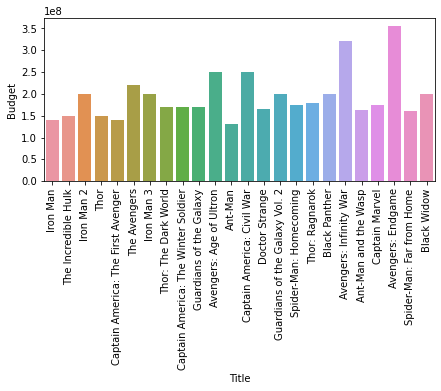

In [11]:
f, ax = plt.subplots(figsize=(7, 3))
ax.tick_params(axis='x', rotation=90)
sns.barplot(x = 'Title',y='Budget', data=marvel_df[marvel_df.index<24]);

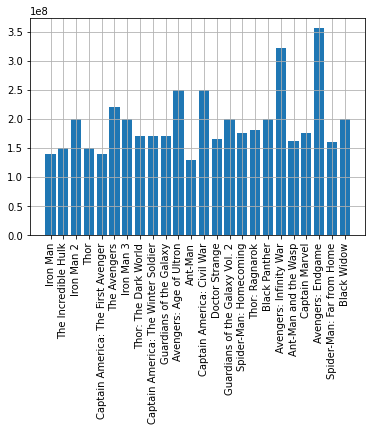

In [12]:
PropType = marvel_df[marvel_df.index<24]
plt.bar(PropType.Title, PropType.Budget)
plt.xticks(PropType.Title,rotation = 90)
plt.grid();

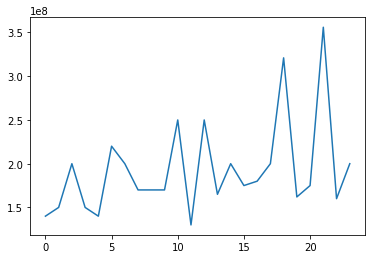

In [15]:
plt.plot(marvel_df.Budget[marvel_df.index<24]);

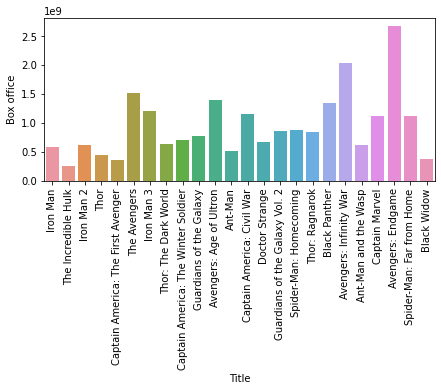

In [13]:
f, ax = plt.subplots(figsize=(7, 3))
ax.tick_params(axis='x', rotation=90)
sns.barplot(x = 'Title',y='Box office', data=marvel_df);

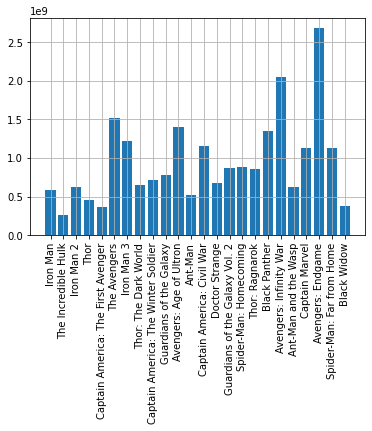

In [14]:
PropType = marvel_df
plt.bar(PropType.Title, PropType['Box office'])
plt.xticks(PropType.Title,rotation = 90)
plt.grid();

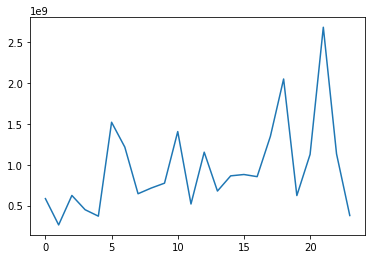

In [28]:
plt.plot(marvel_df['Box office']);

as we notice, Avengers infinety war and Avengers Endgame movies are the highest in budget and in Box office revenue due to all marvel superhero making apperance on screen. so we will consider them as outliers and drop those two movies

In [31]:
marvel_df.drop(index=[18,21], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


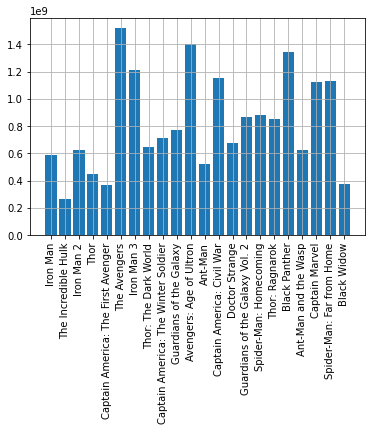

In [32]:
PropType = marvel_df
plt.bar(PropType.Title, PropType['Box office'])
plt.xticks(PropType.Title,rotation = 90)
plt.grid();

In [72]:
# PropType = marvel_df
# width = 0.35 
# fig, ax = plt.subplots()
# plt.bar(PropType.Title, PropType.Budget, width, color='r')
# plt.bar(PropType.Title + width, PropType['Box office'], width, color='y')
# # plt.bar(PropType.Title, PropType.Budget)
# plt.xticks(PropType.Title+ width/2,rotation = 90)
# plt.grid();

in the two graphs above we can see that not black widow is one of lowest marvel movies in boc office revenue due to COVID-19 restriction + releasing it on streaming services on the same time.

from the graph below, we can notice a corelation between budget and box office revenue

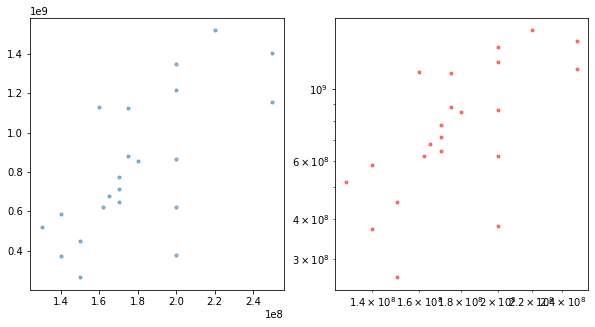

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(PropType['Budget'],PropType['Box office'],alpha = 0.5,s=10);

plt.subplot(1,2,2)
plt.loglog(PropType['Budget'],PropType['Box office'],'r.',alpha = 0.5);

In [17]:
# i should check the data manually
# 

#MTA dataset

The Metropolitan Transportation Authority is North America's largest transportation network, serving a population of 15.3 million people across a 5,000-square-mile travel area surrounding New York City through Long Island, southeastern New York State, and Connecticut.

The MTA network comprises the nation’s largest bus fleet and more subway and commuter rail cars than all other U.S. transit systems combined. The MTA's operating agencies are MTA New York City Transit, MTA Bus, Long Island Rail Road, Metro-North Railroad, and MTA Bridges and Tunnels.

1.  in the most crowded turnstile we will recommend utalizing the screens to display quick trailer of the movie
2. in the least crowded trunstile but in a crowded station we will recommend adding posters.
3. in the most crowded station we will recommend adding LOCATION-BASED ads on social media.

In [18]:
from datetime import date, timedelta, datetime

First, we took data from a eleven-week period from the week ending 22 May 2021 to the week ending 31 July 2021.
this represent the time after Black Widow movie released on theaters and on streaming services. by analysing the crowed in this time it will give our client a realistic estimation of the people who will see thier ads on Augest which is one month of ads before releasing Shang-Chi on theaters

as per the code snippet below:

In [19]:
def formatted_numbers(start_ = date(2021, 5, 22), end_= datetime.date(datetime.now())): 
    LON = []
    for i in pd.date_range(start=start_, end=end_, freq='7D'):
        ii = str(i)
        formated_date = ii[2:4] + ii[5:7] + ii[8:10]
        LON.append(int(formated_date))
    return LON

In [20]:
formatted_numbers(end_ = date(2021,7,31))

[210522,
 210529,
 210605,
 210612,
 210619,
 210626,
 210703,
 210710,
 210717,
 210724,
 210731]

In [21]:
def read_MTA(list_of_numbers):
    df_url = pd.DataFrame()
    for i in list_of_numbers:
        df_url = df_url.append(pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_"+str(i)+".txt"))
    return df_url.reset_index()

In [22]:
turnstiles_df = read_MTA(formatted_numbers(end_ = date(2021,7,31)))

In [23]:
turnstiles_df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,00:00:00,REGULAR,7571883,2587474
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,04:00:00,REGULAR,7571891,2587475
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,08:00:00,REGULAR,7571901,2587491
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,12:00:00,REGULAR,7571944,2587529
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/15/2021,16:00:00,REGULAR,7572041,2587565


Now we will check for any irregular values in the data.

In [24]:
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

we can see the EXITS columns have unwanted spaces so we will remove them

In [25]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [26]:
turnstiles_df.DATE.value_counts().sort_index()

05/15/2021    29928
05/16/2021    29808
05/17/2021    30029
05/18/2021    29904
05/19/2021    29824
              ...  
07/26/2021    29816
07/27/2021    29928
07/28/2021    29923
07/29/2021    30016
07/30/2021    30061
Name: DATE, Length: 77, dtype: int64

In [45]:
turnstiles_df.DESC.unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

we will focus only on regular audit in this project

In [47]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION"], 
                          inplace=True, ascending=False)

In [51]:
turnstiles_df[turnstiles_df['DESC'] == 'RECOVR AUD']

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
418192,208877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/23/2021,09:00:00,RECOVR AUD,5554,563
2094106,209360,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/17/2021,17:00:00,RECOVR AUD,5554,585
2094107,209361,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/17/2021,21:00:00,RECOVR AUD,5554,585
2094110,209364,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/18/2021,09:00:00,RECOVR AUD,5554,585
2094111,209365,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/18/2021,13:00:00,RECOVR AUD,5554,585
...,...,...,...,...,...,...,...,...,...,...,...,...
418323,96,A002,R051,02-03-00,59 ST,NQR456W,BMT,05/31/2021,00:00:00,RECOVR AUD,1432555,5411127
209357,42,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/22/2021,04:00:00,RECOVR AUD,6708915,1527518
418281,54,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/31/2021,00:00:00,RECOVR AUD,6711684,1528507
209316,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2021,04:00:00,RECOVR AUD,7575515,2588982


In [56]:
turnstiles_df = turnstiles_df[turnstiles_df['DESC'] != 'RECOVR AUD']

Each combination of C/A, UNIT, SCP, and STATION represents a unique turnstile. so we will cimbine them in a new column called turn_id

In [52]:
turnstiles_df['turn_id'] = turnstiles_df["C/A"] +  turnstiles_df["UNIT"]+ turnstiles_df["SCP"] +turnstiles_df["STATION"]

from the columns description in mta, we know that ENTRIES and EXISTS are cumulative values. so we will be aggregating by day using:

In [60]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.min())

In [62]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/15/2021,7571883
1,A002,R051,02-00-00,59 ST,05/16/2021,7572256
2,A002,R051,02-00-00,59 ST,05/17/2021,7572569
3,A002,R051,02-00-00,59 ST,05/18/2021,7573123
4,A002,R051,02-00-00,59 ST,05/19/2021,7573760
...,...,...,...,...,...,...
384249,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/26/2021,5554
384250,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/27/2021,5554
384251,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/28/2021,5554
384252,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/29/2021,5554


In [55]:
turnstiles_daily['ENTRIES_Per_Day'] = turnstiles_daily['ENTRIES'].diff().shift(-1)
turnstiles_daily


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,ENTRIES_Per_Day
0,A002,R051,02-00-00,59 ST,05/15/2021,7571883,373.0
1,A002,R051,02-00-00,59 ST,05/16/2021,7572256,313.0
2,A002,R051,02-00-00,59 ST,05/17/2021,7572569,554.0
3,A002,R051,02-00-00,59 ST,05/18/2021,7573123,637.0
4,A002,R051,02-00-00,59 ST,05/19/2021,7573760,569.0
...,...,...,...,...,...,...,...
384514,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/26/2021,5554,0.0
384515,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/27/2021,5554,0.0
384516,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/28/2021,5554,0.0
384517,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/29/2021,5554,0.0
